# Gradient Descend Method

**Gradient Descend Method**

*   We may not know where our best spot is.
*   But if we know the **right direction**,
*   keep going on the **right direction**.
*   Doing so, we will be better at every step.
*   Eventually, with enough time, we will get to **the best spot**.
*   **Caution!** Don't be rush. You might have passed your best spot. 




**right direction** = negative gradient

In [480]:
def g(u):
    return u**2 - 3*u + 225

In [481]:
def gd(grad_loss , w0, step_size , num=500):
    w = w0
    for i in range(num): 
        w = w - step_size * grad_loss(w) 
        
    return w

In [482]:
'''
Here, we modify the gradient descend function: adding loss tracking
'''

def gdl(grad_loss , w0, step_size , num=500, lossf=None):
    w = w0
    if lossf is not None:
        losses = [lossf(w)]

    for i in range(num): 
        w = w - step_size * grad_loss(w) 

        if lossf is not None:
            losses.append(lossf(w))

    if lossf is None:
        return w
    else:
        return w, losses

## Example of GD application

In [483]:
# Example
def loss(u):

  return (u - 4.5)**2


def grad(u):
  return 2*(u - 4.5)  


In [484]:
import numpy as np
from matplotlib import pyplot as plt

## Exercise 1

$\min_u \cos(u-2) \cdot \exp(-(\frac{u}{10})^2)$

Recall
* Chain rule: 
  $$\frac{d g(u)}{d x} = \frac{d g(u)}{d u} \frac{d u}{d x}$$
* Derivative of cosine
  $$\frac{d \cos(f(x)}{d x} = - \sin(f(x)) \frac{d f(x)}{dx}$$
* Derivative of exponential
  $$\frac{d \exp(f(x)}{d x} = \exp(f(x)) \frac{d f(x)}{dx}$$
* Derivative of prodict
  $$\frac{d f(x) g(x)}{d x} = f(x) \frac{d g(x)}{dx} + g(x) \frac{d f(x)}{dx}$$

In [485]:
# First, write the loss

def loss1(u):
  return np.cos(u-2) * np.exp(-(u/10)**2)

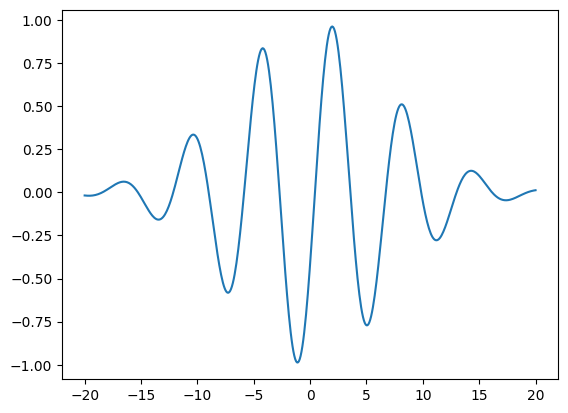

In [486]:
# Test it

us = np.linspace(-20, 20, 500)
plt.plot(us, loss1(us))

In [487]:
# Next, we find its gradient.

def grad1(u):

  return np.exp(-(u/10)**2) * ( -u/50 * np.cos(u - 2) - np.sin(u - 2) )


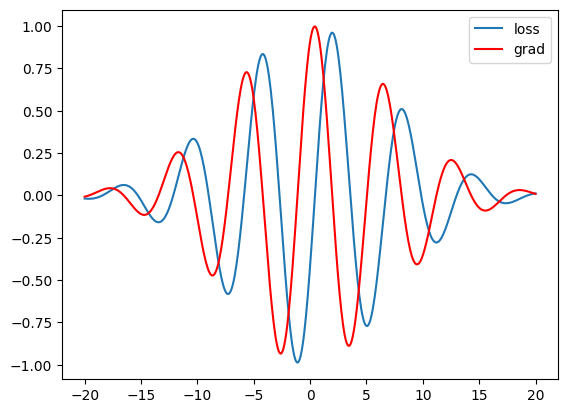

In [488]:
# Test. Always test your code!

us = np.linspace(-20, 20, 500)
plt.plot(us, loss1(us))
plt.plot(us, grad1(us), 'r')
plt.legend(['loss', 'grad'])

Examine the the plot: recall that derivative is kinda a slope of the function.

### Sympy example

If you are shaky on calculus, you may double-check your work with 'symbolic math', e.g., ```sympy```.

In [489]:
from sympy import symbols, diff

# Example
x, y = symbols('x y')
expr = x + 2*y + 4*x**2

diff(expr, x)

8*x + 1

In [490]:
from sympy import cos, exp  # You must use sympy's functions, otherwise it cannot work symbolically!

u = symbols('u')
L = cos(u - 2) * exp(-(u/10)**2)

dL = diff(L, u)

dL

-u*exp(-u**2/100)*cos(u - 2)/50 - exp(-u**2/100)*sin(u - 2)

In [491]:
from sympy import factor

factor(dL)

-(u*cos(u - 2) + 50*sin(u - 2))*exp(-u**2/100)/50

In [492]:
from sympy import simplify

simplify(dL)

(-u*cos(u - 2)/50 - sin(u - 2))*exp(-u**2/100)

### Run GD to solve the problem.

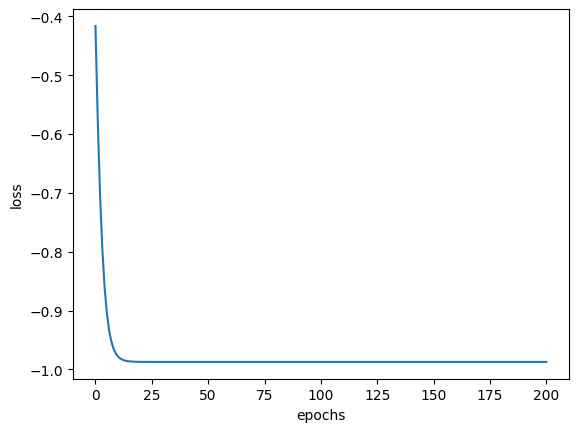


Minimizer = -1.11921214807866


In [493]:
u0= 0
lr = 0.2
N = 200
u, losses = gdl(grad1, u0, lr, N, loss1)

plt.plot(losses)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()


print('\nMinimizer =', u)

Text(0, 0.5, 'loss')

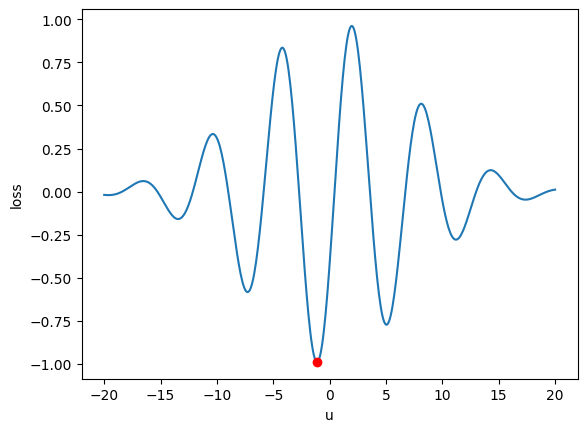

In [494]:
# Visualize the result

us = np.linspace(-20, 20, 500)
plt.plot(us, loss1(us))
plt.plot(u, loss1(u), 'or')
plt.xlabel('u')
plt.ylabel('loss')

### Examine the effect of initial point




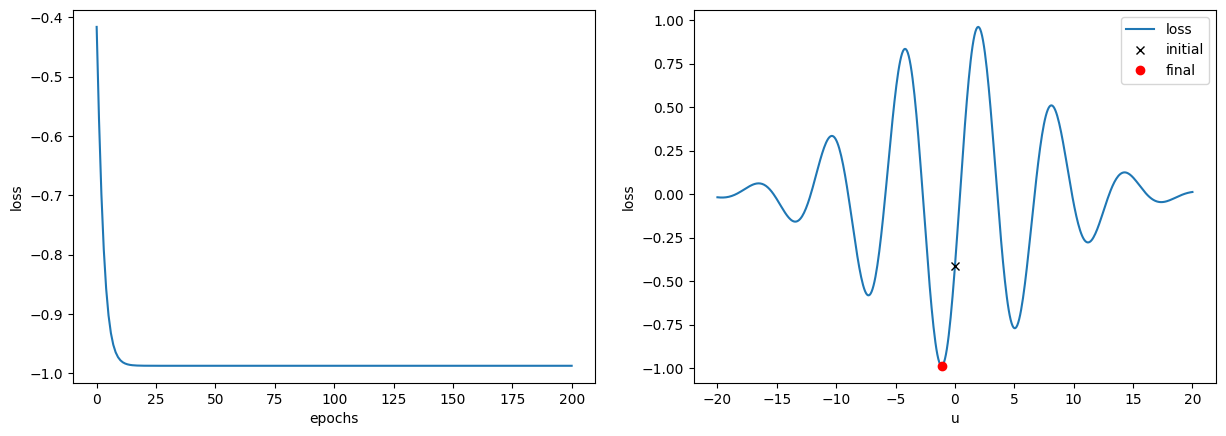


Minimizer = -1.11921214807866


In [495]:
u0= 0
lr = 0.2
N = 200
u, losses = gdl(grad1, u0, lr, N, loss1)
gu = g(u)
gu0 = g(u0)

############################################################
# Visualization
############################################################

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(rect=[0.1, 0.1, 2, 1], h_pad=4, w_pad=4)

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.xlabel('epochs')
plt.ylabel('loss')


plt.subplot(1, 2, 2)
us = np.linspace(-20, 20, 500)
plt.plot(us, loss1(us))
plt.plot(u0, loss1(u0), 'xk')
plt.plot(u, loss1(u), 'or')
plt.xlabel('u')
plt.ylabel('loss')
plt.legend(['loss', 'initial', 'final'])

plt.show()
print('\nMinimizer =', u)

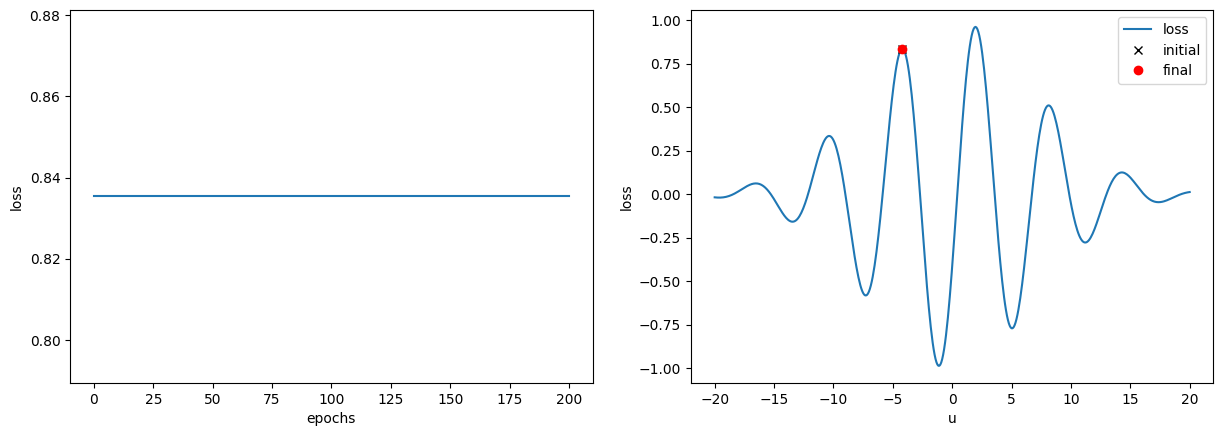


Minimizer = -4.1993940765212106


In [496]:
# Try new intial points
# u0 = 1, 2, 3, 4, 5, 6
# -4, -5, -10, -12
# 1.9608040048550777, -4.1993940765212106

u0= -4.1993940765212106
lr = 0.2
N = 200
u, losses = gdl(grad1, u0, lr, N, loss1)
gu = g(u)
gu0 = g(u0)

############################################################
# Visualization
############################################################

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(rect=[0.1, 0.1, 2, 1], h_pad=4, w_pad=4)

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.xlabel('epochs')
plt.ylabel('loss')


plt.subplot(1, 2, 2)
us = np.linspace(-20, 20, 500)
plt.plot(us, loss1(us))
plt.plot(u0, loss1(u0), 'xk')
plt.plot(u, loss1(u), 'or')
plt.xlabel('u')
plt.ylabel('loss')
plt.legend(['loss', 'initial', 'final'])

plt.show()
print('\nMinimizer =', u)

#### Good practice for initialization

Random initialization

In [497]:
np.random.rand(1)

array([0.87783939])

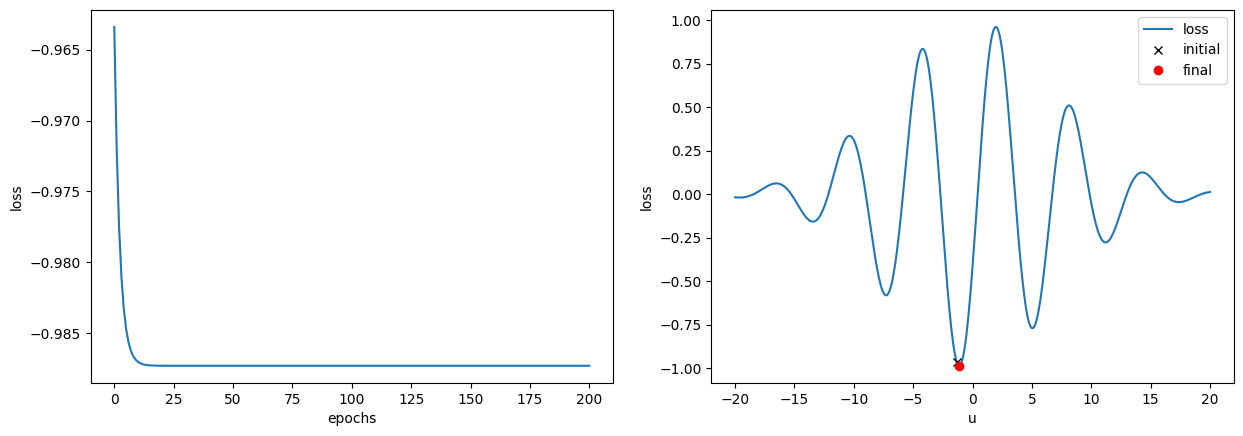


Minimizer = -1.1192121480786608


In [498]:
u0= np.random.normal(0, 7)
lr = 0.2
N = 200
u, losses = gdl(grad1, u0, lr, N, loss1)
gu = g(u)
gu0 = g(u0)

############################################################
# Visualization
############################################################

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(rect=[0.1, 0.1, 2, 1], h_pad=4, w_pad=4)

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.xlabel('epochs')
plt.ylabel('loss')


plt.subplot(1, 2, 2)
us = np.linspace(-20, 20, 500)
plt.plot(us, loss1(us))
plt.plot(u0, loss1(u0), 'xk')
plt.plot(u, loss1(u), 'or')
plt.xlabel('u')
plt.ylabel('loss')
plt.legend(['loss', 'initial', 'final'])

plt.show()
print('\nMinimizer =', u)

### Examine the effect of learning rate and a number of epochs

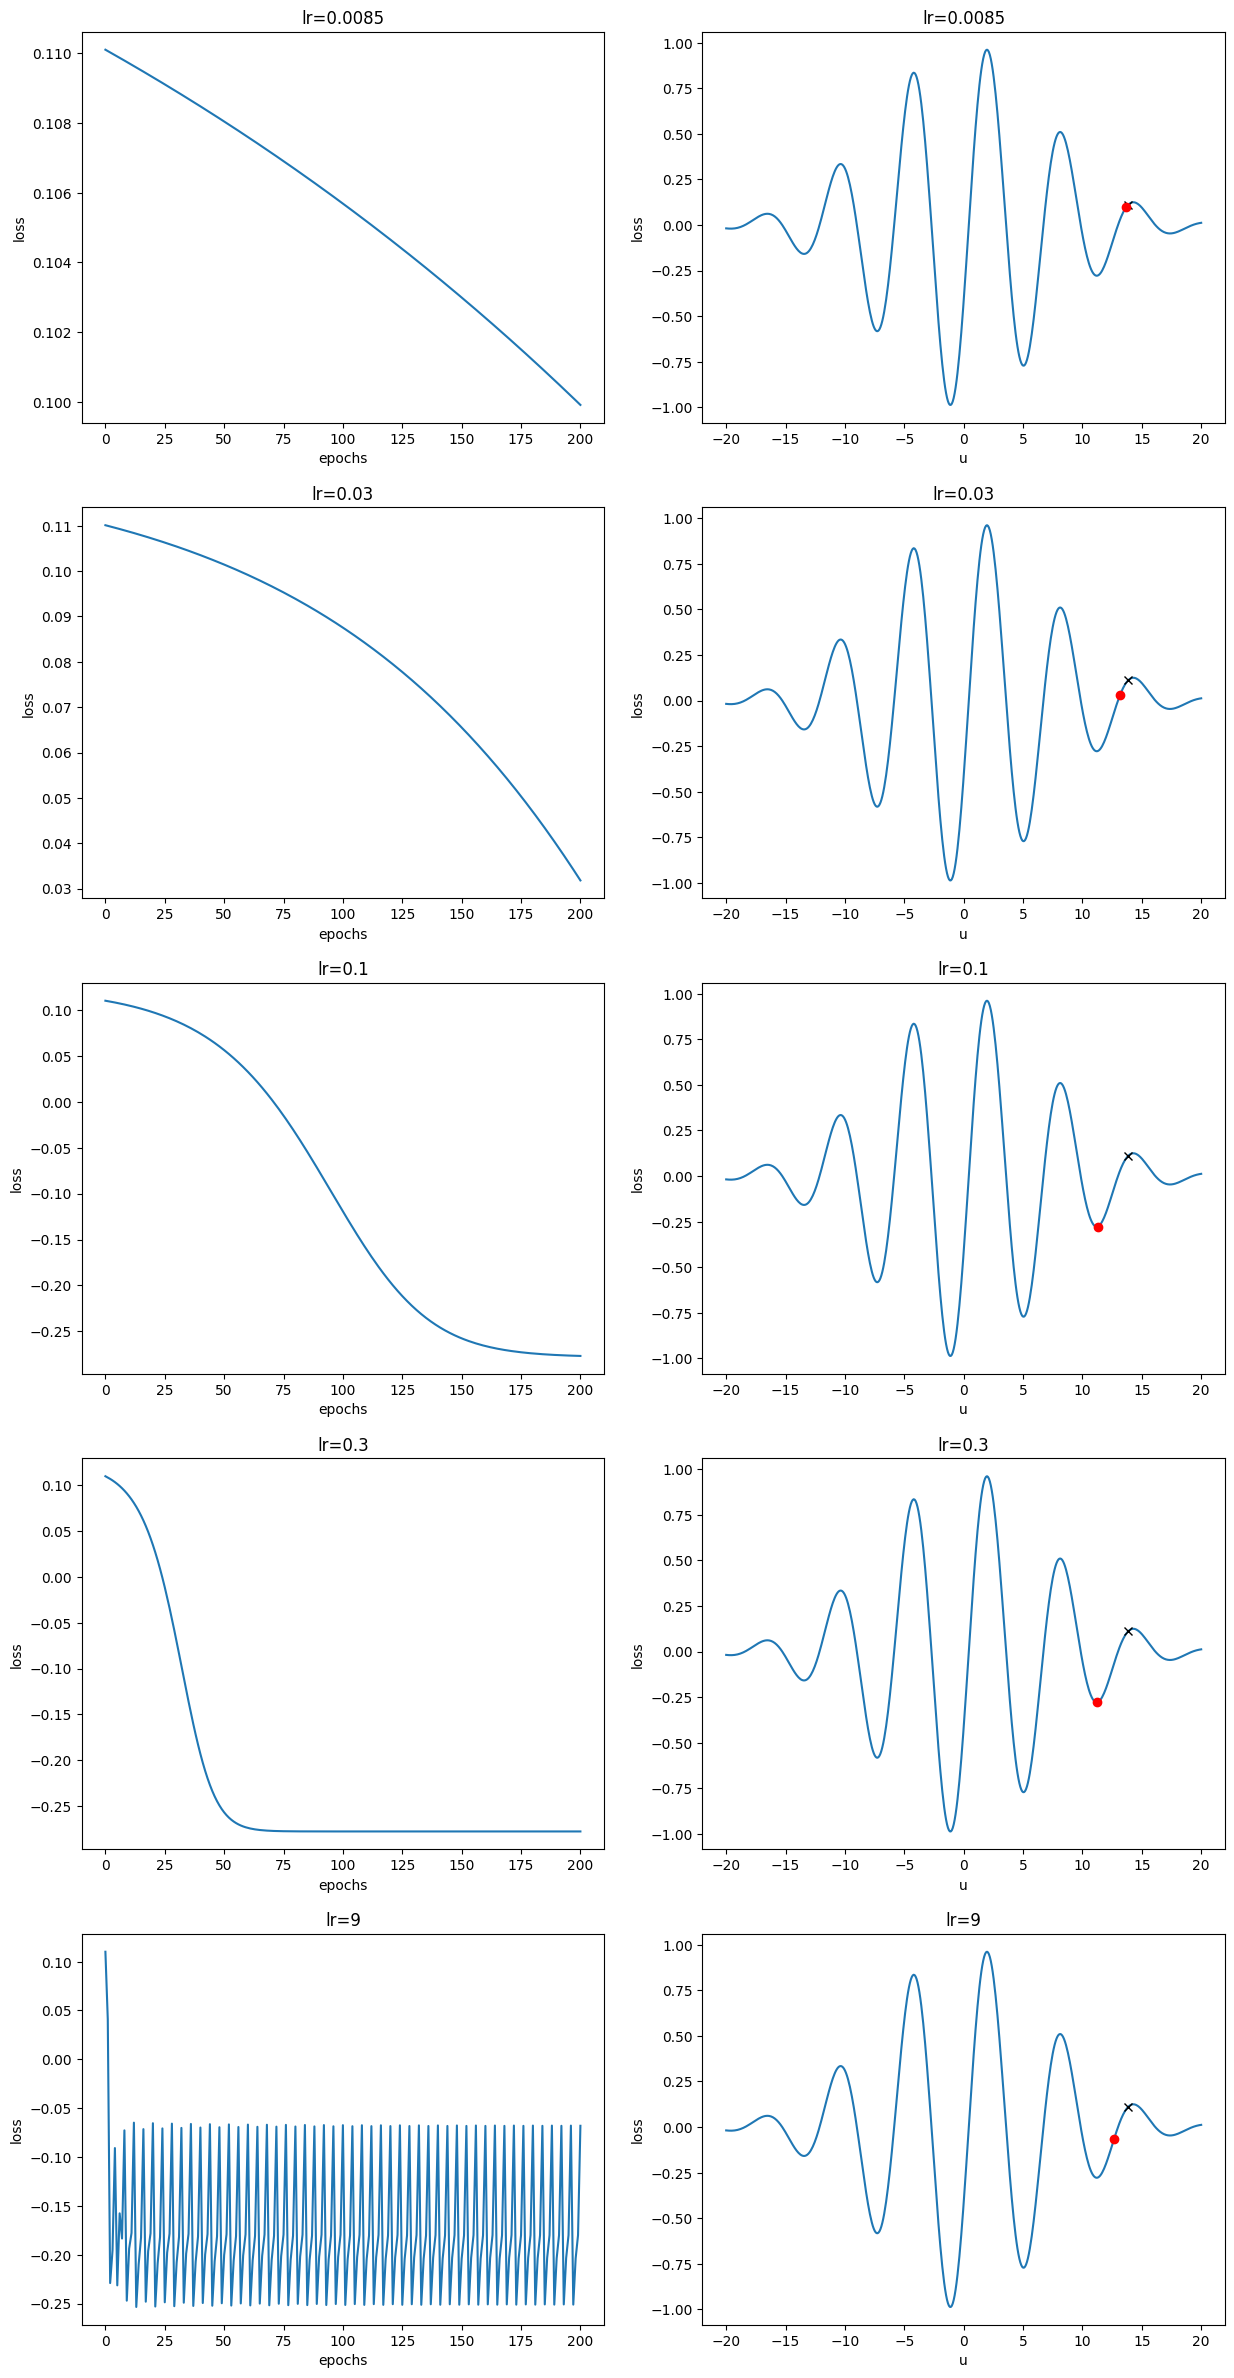

In [499]:
# Try it multiple times
# Sometimes they all are fine.
# Sometimes large lr shows divergence, sometimes it's just fine.
# Sometimes large lr shows jump over, many times it just stays in its vicinity.
# Sometimes small lr shows short of epochs, sometimes it's just fine.

u0= np.random.normal(0, 7)

lrs = [0.0085, 0.03, 0.1, 0.3, 9]
num_c = len(lrs)

u_c = []
losses_c = []

for lr in lrs:
  N = 200
  u, losses = gdl(grad1, u0, lr, N, loss1)

  u_c.append(u)
  losses_c.append(losses)
# end for lr

############################################################
# Visualization
############################################################

fig, axes = plt.subplots(nrows=num_c, ncols=2)
fig.tight_layout(rect=[0.1, 0.1, 2, num_c], h_pad=4, w_pad=4)

for i in range(num_c):
  plt.subplot(num_c, 2, 2*i+1)
  plt.plot(losses_c[i])
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.title('lr='+str(lrs[i]))

  plt.subplot(num_c, 2, 2*i+2)
  us = np.linspace(-20, 20, 500)
  plt.plot(us, loss1(us))
  plt.plot(u0, loss1(u0), 'xk')
  plt.plot(u_c[i], loss1(u_c[i]), 'or')
  plt.xlabel('u')
  plt.ylabel('loss')
  plt.title('lr='+str(lrs[i]))

  #plt.legend(['loss', 'initial', 'final'])
# end for i

plt.show()

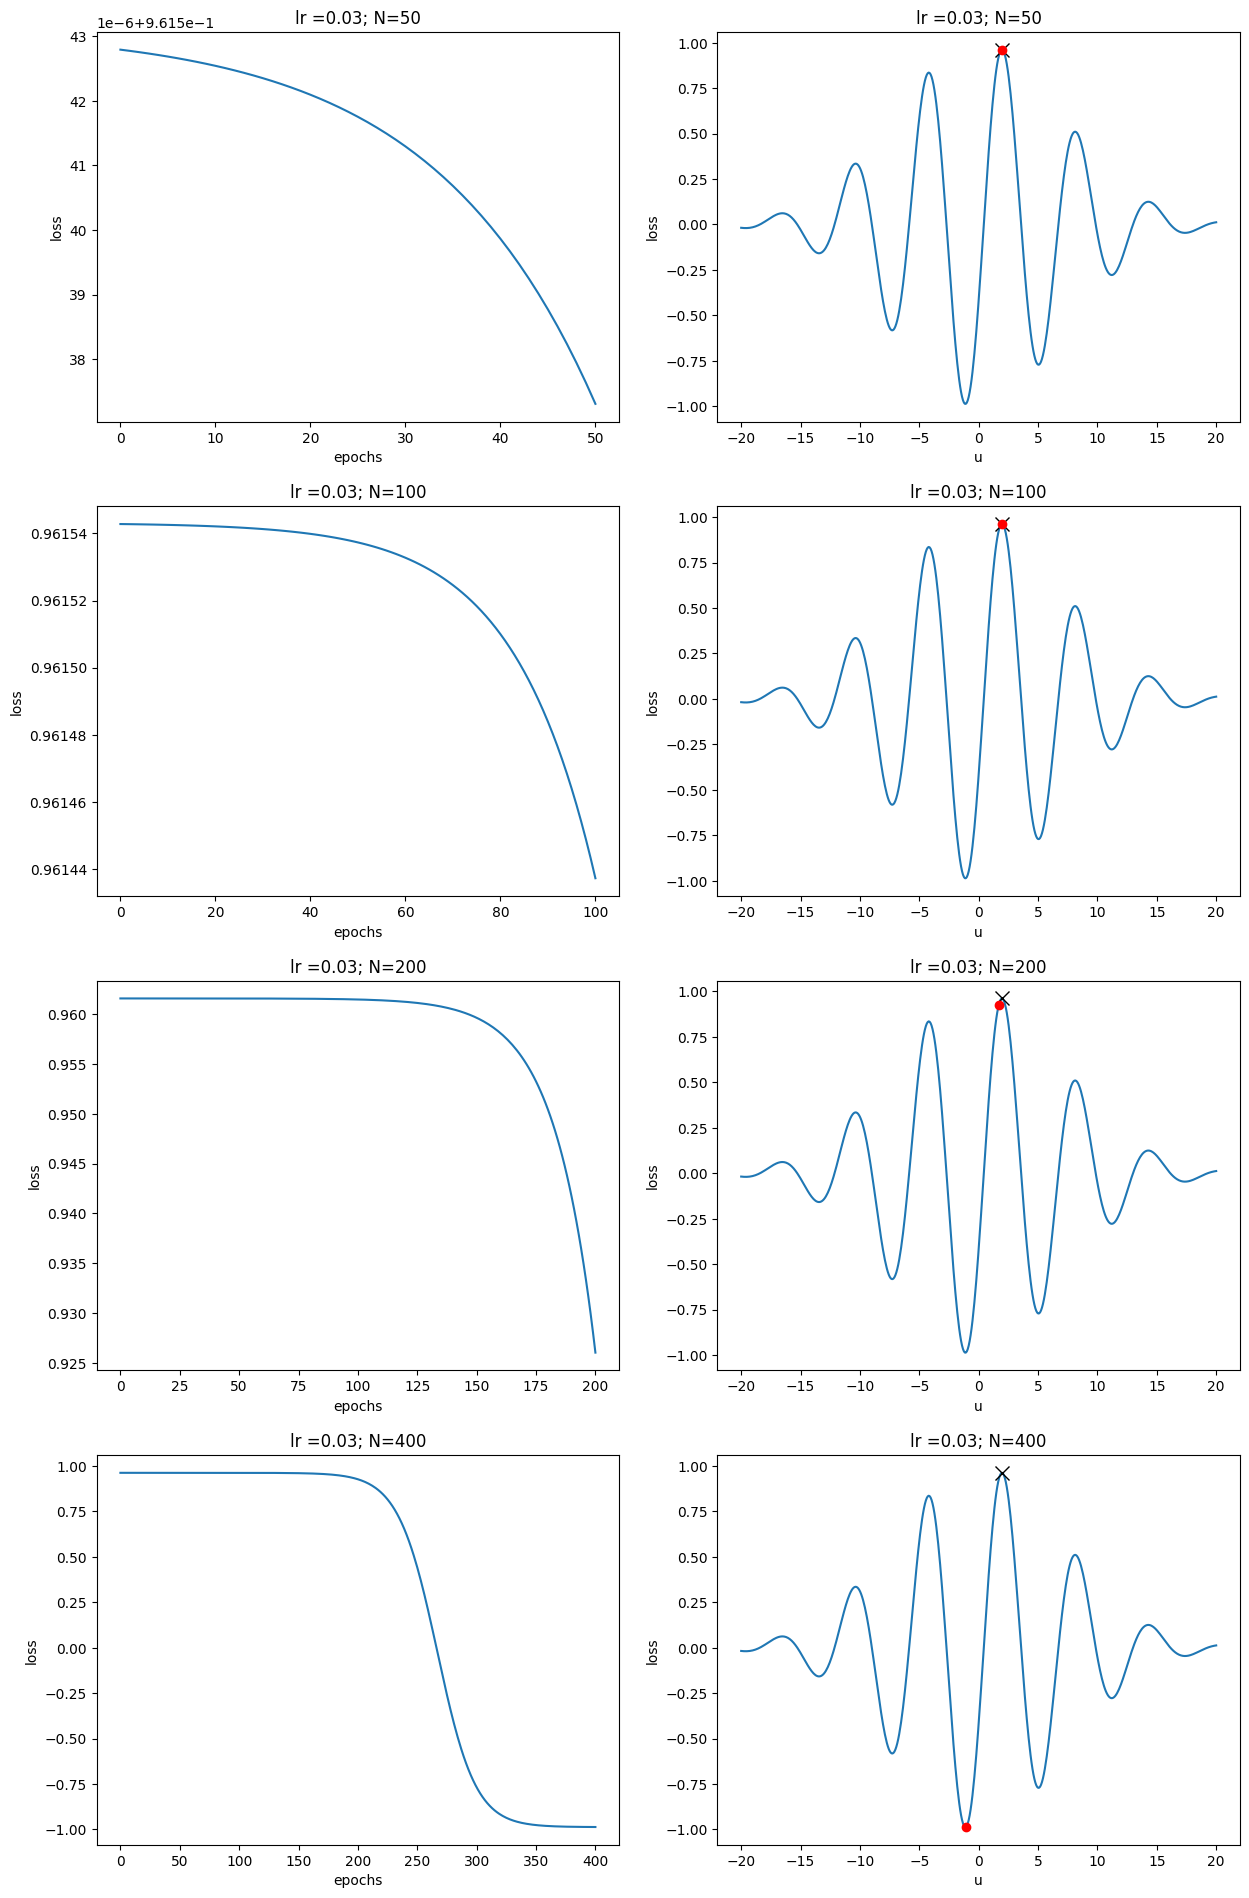

[1.9573689420960025, 1.9461234305266721, 1.6920315145806677, -1.0871787764222323]


In [500]:
u0s = [-1.1, 0, 1, 1.96]
i = np.random.choice(len(u0s), 1)[0]
u0= u0s[i]

Ns = [50, 100, 200, 400]
num_c = len(Ns)

u_c = []
losses_c = []
lr = 0.03

for N in Ns:
  
  u, losses = gdl(grad1, u0, lr, N, loss1)

  u_c.append(u)
  losses_c.append(losses)
# end for lr

############################################################
# Visualization
############################################################

fig, axes = plt.subplots(nrows=num_c, ncols=2)
fig.tight_layout(rect=[0.1, 0.1, 2, num_c], h_pad=4, w_pad=4)

for i in range(num_c):
  plt.subplot(num_c, 2, 2*i+1)
  plt.plot(losses_c[i])
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.title('lr ={}'.format(lr) +'; N='+str(Ns[i]))

  plt.subplot(num_c, 2, 2*i+2)
  us = np.linspace(-20, 20, 500)
  plt.plot(us, loss1(us))
  plt.plot(u0, loss1(u0), 'xk', markersize=10)
  plt.plot(u_c[i], loss1(u_c[i]), 'or')
  plt.xlabel('u')
  plt.ylabel('loss')
  plt.title('lr ={}'.format(lr) +'; N='+str(Ns[i]))

  #plt.legend(['loss', 'initial', 'final'])
# end for i

plt.show()

print(u_c)

## Exercise 2

$\min_{u_1, u_2} (2.8 - u_1)^2 + (6.1 - 2u_2)^2$

This one is 2 dimensional.

In [501]:
def loss2(U):
  '''
  U: np.array of shape (2,N)
  '''

  L = (2.8 - U[0,:])**2 + (6.1 - 2*U[1,:])**2

  return L

In [502]:
# Test

u = np.array([2, 6]).reshape((2,1))

loss2(u)

array([35.45])

In [503]:
u = np.array([[2, 2.4, 2.8, 3], [5.8, 6, 6.1, 6.2]])

loss2(u)

array([30.89, 34.97, 37.21, 39.73])

### Make a 3D plot

To display this 2D variable, we need 3D plot.

Plotting 3D takes quite an effort.

/var/folders/yb/js31_6gd43s36c3p9ptbm6xm0000gn/T/ipykernel_69450/658632849.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


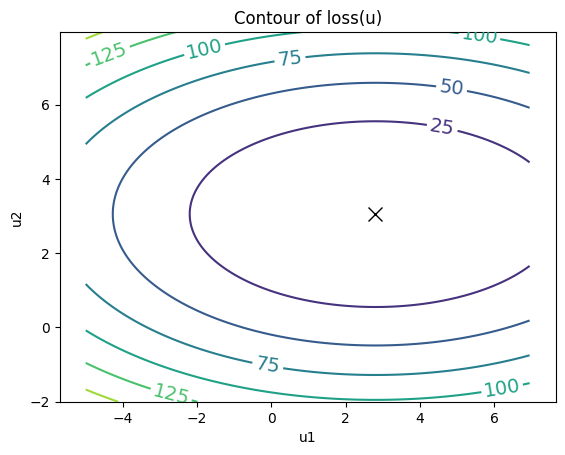

In [504]:
# Plot

delta = 0.05
x = np.arange(-5, 7, delta)
y = np.arange(-2, 8, delta)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)

for j in range(len(y)):
  for i in range(len(x)):
    Z[j, i] = loss2(np.array([[X[j,i]], [Y[j,i]]]))[0]


############################################################
# Visualization
############################################################

fig, ax = plt.subplots()

CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=14)
ax.set_title('Contour of loss(u)')
ax.axis('equal')
ax.set_xlabel('u1')
ax.set_ylabel('u2')

ax.plot([2.8], [3.05], 'xk', markersize=10)

fig.show()

In [505]:
from matplotlib.ticker import LinearLocator
import matplotlib.cm as cm

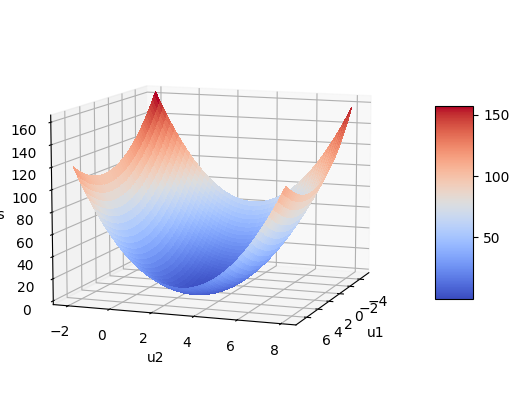

In [506]:
# Plot the surface.
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the display
ax.view_init(elev=10, azim=20)
#ax.set_zlim(-1.0, 0)
#ax.zaxis.set_major_locator(LinearLocator(8))

ax.set_zlabel('loss')
ax.set_ylabel('u2')
ax.set_xlabel('u1')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

fig.set_figwidth(8)
fig.set_figheight(5)

plt.show()

### Find gradient

Recall for a 2D-variable case a gradient is a 2D vector.

$$\nabla_\mathbf{u} g = \begin{bmatrix}\frac{\partial g}{\partial u_1} \\ \frac{\partial g}{\partial u_2}\end{bmatrix}$$

### Sympy to double-check

In [507]:
u1, u2 = symbols('u1, u2')
L = (2.8 - u1)**2 + (6.1 - 2*u2)**2

dL1 = diff(L, u1)
dL2 = diff(L, u2)

print(dL1)
print(dL2)

2.0*u1 - 5.6
8.0*u2 - 24.4


In [508]:
def grad2(U):
  '''
  U: np.array of shape (2,N)
  '''
  c = np.array([[2, 8]]).T
  b = np.array([[5.6, 24.4]]).T

  return np.multiply(c, U) - b

In [509]:
# Test

grad2(np.array([[2.8], [6.1]]))

array([[ 0. ],
       [24.4]])

Do manual calculation to check it.

In [510]:
grad2(np.array([[2.8, 3, 5], [6.1, 6.5, 6.8]]))

array([[ 0. ,  0.4,  4.4],
       [24.4, 27.6, 30. ]])

### Run GD to solve the problem

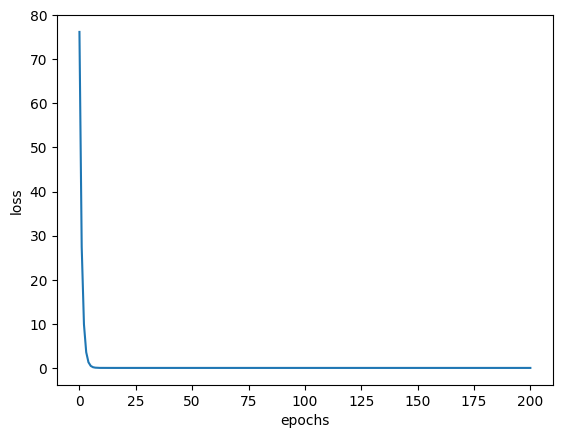

Initial = [[-0.52786586]
 [-0.98541528]]

Minimizer = [[2.8 ]
 [3.05]]


In [511]:
u0= np.random.normal(0, 1, 2).reshape((2,1))
lr = 0.2
N = 200
u, losses = gdl(grad2, u0, lr, N, loss2)

plt.plot(losses)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

print('Initial =', u0)
print('\nMinimizer =', u)

## Exercise 3

$\min_u -\exp(-(u-29)^2)$

Minimum u: 0.0
Minimum value: -0.0


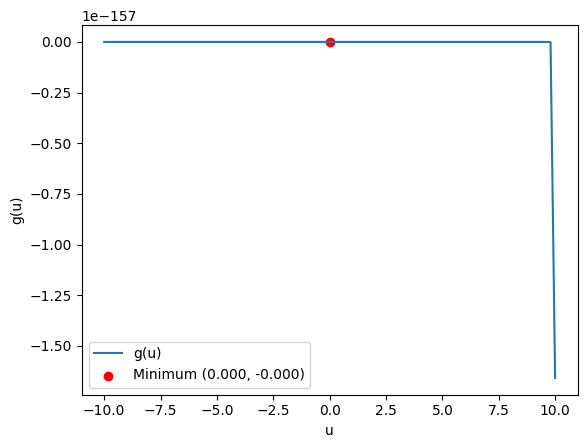

In [512]:
def g(x):
    return -np.exp(-(x-29)**2)

def grad(x):
    return 2*(x-29)*np.exp(-(x-29)**2)

def minimize(x0, eta, n_iter):
    x = x0
    for i in range(n_iter):
        x -= eta * grad(x)
    return x

if __name__ == "__main__":
    # Define initial values
    x0 = 0.0  # Initial guess
    eta = 0.01  # Step size (learning rate)
    n_iter = 1000  # Number of iterations

    # Perform gradient descent
    min_u = minimize(x0, eta, n_iter)

    # Calculate the minimum value of the function
    min_value = g(min_u)

    # Print the results
    print(f"Minimum u: {min_u}")
    print(f"Minimum value: {min_value}")

    # Plot the function and the minimum point
    v = np.linspace(-10, 10, 100)
    plt.plot(v, g(v), label='g(u)')
    plt.scatter(min_u, min_value, color='red', label=f'Minimum ({min_u:.3f}, {min_value:.3f})')
    plt.xlabel('u')
    plt.ylabel('g(u)')
    plt.legend()
    plt.show()

## Exercise 4

$\min_\mathbf{u} g(\mathbf{u})$

where

$g(\mathbf{u}) = -\exp(-53 -u_1^2 - 2 u_2^2 -u_1 u_2 + 10 u_1 + 19 u_2)$

or

$g(\mathbf{u}) = -\exp(-(\mathbf{u} - \begin{bmatrix} 3\\ 4\end{bmatrix})^T \cdot \begin{bmatrix} 1 & 0.5\\ 0.5 & 2\end{bmatrix} \cdot (\mathbf{u} - \begin{bmatrix} 3\\ 4\end{bmatrix}))$

and $\mathbf{u} = [u_1, u_2]^T$

In [513]:
def g(u1, u2):
    gu = - np.exp(-53 - u1**2 - 2*u2**2 - u1*u2 + 10*u1 + 19*u2)
    return gu

In [514]:
import matplotlib.cm as cm

Text(0, 0.5, 'u2')

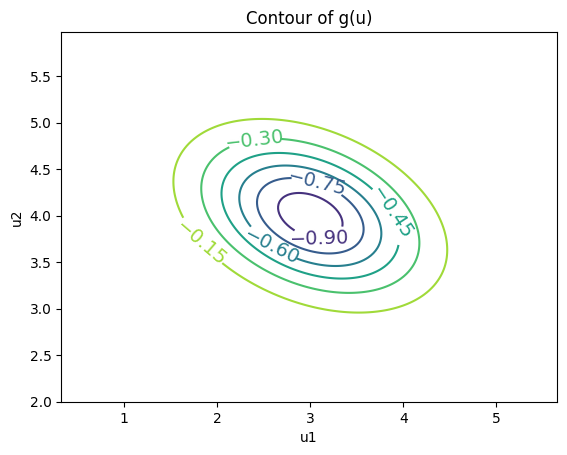

In [515]:
delta = 0.025
x = np.arange(1, 5, delta)
y = np.arange(2, 6, delta)
X, Y = np.meshgrid(x, y)
Z = g(X, Y)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=14)
ax.set_title('Contour of g(u)')
ax.axis('equal')
ax.set_xlabel('u1')
ax.set_ylabel('u2')

In [516]:
Z.shape

(160, 160)

We can visually find the minimizer.

But, to compleate this plot, $g$ is evaluated $160 \times 160 = 25600$ times.

In [517]:
from matplotlib.ticker import LinearLocator

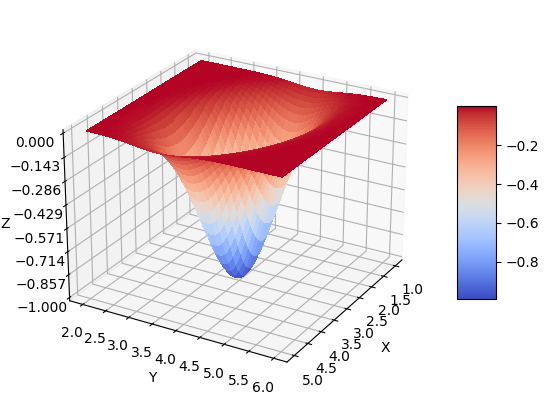

In [518]:
# Plot the surface.
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.view_init(elev=25, azim=30)

# Customize the z axis.
ax.set_zlim(-1.0, 0)
ax.zaxis.set_major_locator(LinearLocator(8))

ax.set_zlabel('Z')
ax.set_ylabel('Y')
ax.set_xlabel('X')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

fig.set_figwidth(8)
fig.set_figheight(5)

plt.show()

We also can vectorize the code.

In [519]:
def h(u):
  mu = np.array([[3],[4]])
  Q = np.array([[1, 0.5], [0.5, 2]])
  gu = -np.exp(-(u-mu).T) @ Q @ (u-mu)
  gu = np.dot(np.dot(-np.exp(-(u-mu).T),Q) , (u-mu))

  return gu

In [520]:
h(np.array([[X[0,1], Y[0,1]]]).T)

array([[58.29261076]])

In [521]:
h(np.array([[X[0,1], Y[0,1]]]).T)[0,0]

58.292610763532515

But, it is a bit inconvenient when plot.

Text(0, 0.5, 'u2')

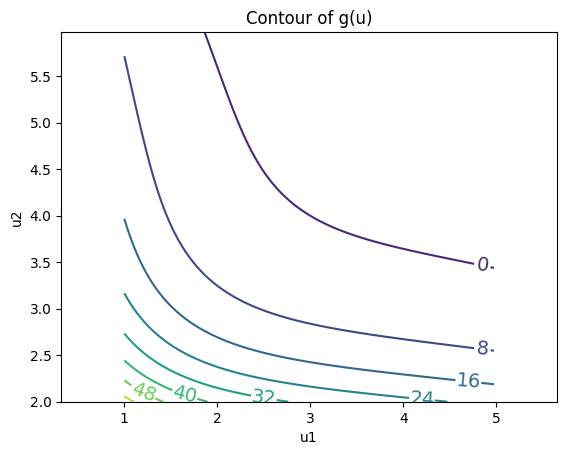

In [522]:
delta = 0.025
x = np.arange(1, 5, delta)
y = np.arange(2, 6, delta)
X, Y = np.meshgrid(x, y)

Z = np.array([[h(np.array([[X[i,j], Y[i,j]]]).T)[0,0] for j in range(len(y))] for i in range(len(x))])

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=14)
ax.set_title('Contour of g(u)')
ax.axis('equal')
ax.set_xlabel('u1')
ax.set_ylabel('u2')

Code the gradient.

In [523]:
def grad_g(uvec):

  gu = h(uvec)

  gradu1 = -9.60268005450868e-24*(-2*uvec[0] - uvec[1] + 10.0)*np.exp(-uvec[0]**2 - uvec[0]*uvec[1] + 10.0*uvec[0] - 2.0*uvec[1]**2 + 19.0*uvec[1])
  gradu2 = -9.60268005450868e-24*(-uvec[0] - 4.0*uvec[1] + 19.0)*np.exp(-uvec[0]**2 - uvec[0]*uvec[1] + 10.0*uvec[0] - 2.0*uvec[1]**2 + 19.0*uvec[1])
  return np.r_[gradu1, gradu2].reshape((2,-1))

import sympy as sp

# Define the variables and the matrix
u1, u2 = sp.symbols('uvec[0] uvec[1]')
u = sp.Matrix([u1, u2])
A = sp.Matrix([[1, 0.5], [0.5, 2]])

# Define the function g(u)
g_u = -sp.exp(-(u - sp.Matrix([3, 4])).T * A * (u - sp.Matrix([3, 4])))

# Compute the gradient
gradient1 = sp.diff(g_u, u1)
gradient2 = sp.diff(g_u, u2)
gradient1 = sp.factor(gradient1)
gradient2 = sp.factor(gradient2)
print(gradient1)
print(gradient2)

  

Matrix([[-9.60268005450868e-24*(-2*uvec[0] - uvec[1] + 10.0)*exp(-uvec[0]**2 - uvec[0]*uvec[1] + 10.0*uvec[0] - 2.0*uvec[1]**2 + 19.0*uvec[1])]])
Matrix([[-9.60268005450868e-24*(-uvec[0] - 4.0*uvec[1] + 19.0)*exp(-uvec[0]**2 - uvec[0]*uvec[1] + 10.0*uvec[0] - 2.0*uvec[1]**2 + 19.0*uvec[1])]])


In [524]:
grad_g(np.array([[2.8], [3.7]]))

array([[-0.52904862],
       [-1.05809724]])

Run gradient descend.

initial u = [[2.5 3.5]], g(u)=[[3.29744254]]
final u = [[2.92832575 4.0132382 ]], g(u)=[[0.07912673]]
[[2.92832575]
 [4.0132382 ]]


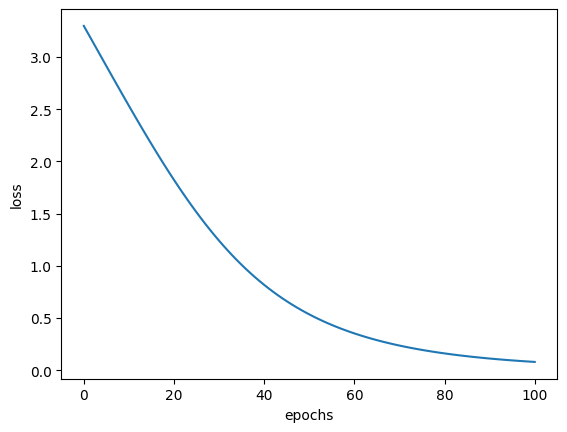

In [525]:
u0= np.array([[2.5], [3.5]])
lr = 0.01
N = 100

# u, losses = gdl(grad_gv, u0, lr, N, gv)
u, losses = gdl(grad_g, u0, lr, N, lambda u: h(u)[0,0])

gu0 = h(u0)
gu = h(u)

uo = np.array([[3],[4]])
guo = h(uo)

print('initial u = {}, g(u)={}'.format(u0.T, gu0))
print('final u = {}, g(u)={}'.format(u.T, gu))

plt.plot(losses)
plt.xlabel('epochs')
plt.ylabel('loss')

print(u)

With 100 epochs, we get to $\sim [2.93, 4.01]^T$ at loss ($g(u)$) of $\sim -1$.

## Exercise 5

$g(\mathbf{u} = [u_1, u_2, u_3, u_4]) = u_1^2 + 2 u_2^2 + u_3^2 + u_4^2 - 10 u_1 + 20 u_2 - 30 u_3 + 40 u_4$

In [526]:
def g(uvec):
  gu = uvec[0]**2 + 2*uvec[1]**2 + uvec[2]**2 + uvec[3]**2 - 10*uvec[0] + 20*uvec[1] - 30*uvec[2] + 40*uvec[3]

  return gu


Plot?

How?

Exhaustive searh?
* Yes!
* ranges of $u_1, \ldots, u_4$ ?
* resolution? 

In [527]:
# Exhaustive search
nsteps = 21 #101
u1s = np.linspace(-10, 10, nsteps)
u2s = np.linspace(-10, 10, nsteps)
u3s = np.linspace(-10, 10, nsteps)
u4s = np.linspace(-10, 10, nsteps)

uint = np.random.rand(4,1)
umin = uint
gmin = g(umin)

ECount = 0 # Evaluation count
print("Initial u = {}, g(u) = {}".format(uint.T, gmin))
for u1 in u1s:
  for u2 in u2s:
    for u3 in u3s:
      for u4 in u4s:
        ui = np.array([u1, u2, u3, u4]).reshape((4,-1))
        gi = g(ui)
        ECount += 1

        if gi < gmin:
          gmin = gi
          umin = ui
# end all for's

print('Final umin = {}, gmin = {}'.format(umin, gmin))
print('Evaluation count =', ECount)

Initial u = [[0.49267628 0.50767857 0.58775896 0.46944297]], g(u) = [7.69580074]
Final umin = [[  5.]
 [ -5.]
 [ 10.]
 [-10.]], gmin = [-575.]
Evaluation count = 194481


Now we will compare it with gradient descend.

In [528]:
def gradf(uvec):
  dg = np.array([2*uvec[0] - 10,
                  4*uvec[1] + 20,
                  2*uvec[2] - 30,
                  2*uvec[3] + 40])

  return dg.reshape((4,-1))

u1, u2, u3, u4 = sp.symbols('uvec[0] uvec[1] uvec[2] uvec[3]')
u = sp.Matrix([u1, u2, u3, u4])
L = u1**2 + 2*u2**2 + u3**2 + u4**2 - 10*u1 + 20*u2 - 30*u3 + 40*u4
diff1 = sp.diff(L, u1)
diff2 = sp.diff(L, u2)
diff3 = sp.diff(L, u3)
diff4 = sp.diff(L, u4)
print(diff1)
print(diff2)
print(diff3)
print(diff4)

2*uvec[0] - 10
4*uvec[1] + 20
2*uvec[2] - 30
2*uvec[3] + 40


initial u = [[0.20506071 0.82228703 0.91123414 0.33955719]], g(u)=[2.98040533]
final u = [[  4.99980329  -4.99999999  14.99942202 -19.99916559]], g(u)=[-699.99999893]
[[  4.99980329]
 [ -4.99999999]
 [ 14.99942202]
 [-19.99916559]]


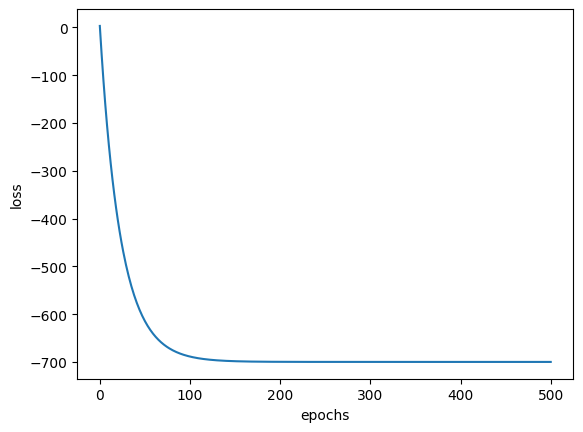

In [529]:
u0= np.random.rand(4,1)
lr = 0.01
N = 500

u, losses = gdl(gradf, u0, lr, N, g)

gu0 = g(u0)
gu = g(u)

print('initial u = {}, g(u)={}'.format(u0.T, gu0))
print('final u = {}, g(u)={}'.format(u.T, gu))

plt.plot(losses)
plt.xlabel('epochs')
plt.ylabel('loss')

print(u)

In [530]:
u = gd(gradf, u0, step_size=0.01 , num=500)

In [531]:
u

array([[  4.99980329],
       [ -4.99999999],
       [ 14.99942202],
       [-19.99916559]])

# The curse of dimensionality

In [532]:
def radius(v):
  '''
  Radius from origin
  v: N x D
  return: r[n] = sqrt(sum_d v[n, d]^2)
  '''

  N, D = v.shape
  
  r = np.sqrt(np.sum(v**2, axis=1))

  return r

In [533]:
def get_norm(num, ndim):
  x = np.random.normal(0, 1, num).reshape((-1,1))
  if ndim > 1:
    mean = np.zeros((ndim,))
    cov = np.identity(ndim)
    x = np.random.multivariate_normal(mean, cov, num)

  return x

## Weird high-dimensional effect: distribution

Text(0, 0.5, 'Frequency')

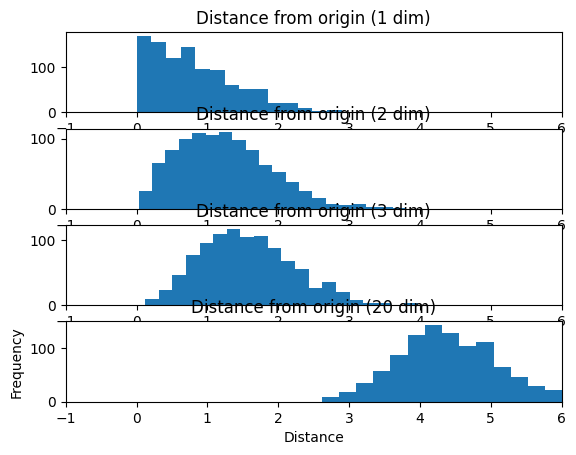

In [534]:
N = 1000
Ds = [1, 2, 3, 20]

ncases = len(Ds)

for i, d in enumerate(Ds):
  x = get_norm(N, d)


  plt.subplot(ncases, 1, i+1)
  plt.title('Distance from origin ({} dim)'.format(d))
  plt.hist(radius(x), bins=20);
  plt.xlim((-1,6))

plt.xlabel('Distance')
plt.ylabel('Frequency')

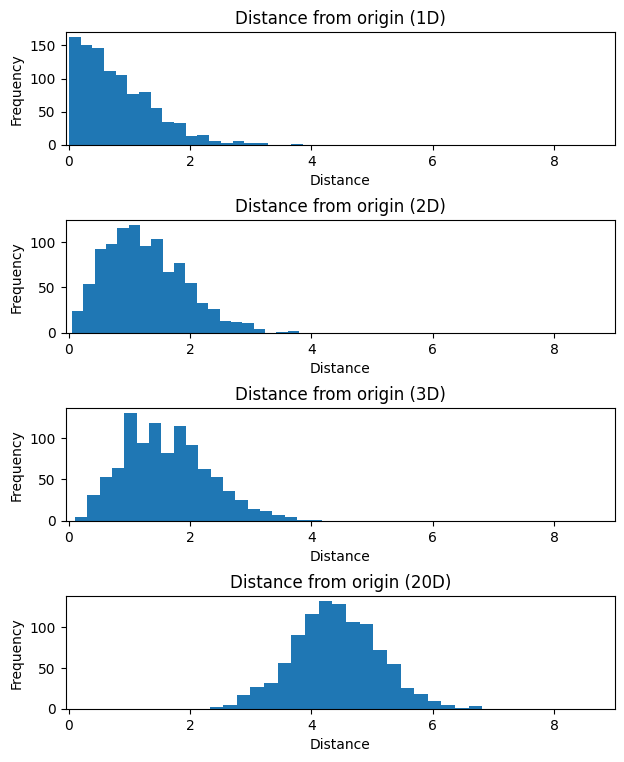

In [535]:
# Set up the figure

fig, axs = plt.subplots(4,1)
fig.tight_layout(rect=[0.1, 0.1, 0.9, 0.9], h_pad=0.5, w_pad=1)

# Set up the axis and the plot element

N = 1000
Ds = [1, 2, 3, 20]

## Subplot(4,1,1)

d = Ds[0]
axs[0].set_xlim((-0.05, 9))
axs[0].set_title('Distance from origin ({}D)'.format(d))

x = get_norm(N, d)
axs[0].hist(radius(x), bins=20);
axs[0].set_xlabel('Distance');
axs[0].set_ylabel('Frequency');

## Other subplots
for i, d in enumerate(Ds[1:]):
  axs[i+1].set_xlim((-0.05, 9))
  axs[i+1].set_title('Distance from origin ({}D)'.format(d))

  x = get_norm(N, d)
  axs[i+1].hist(radius(x), bins=20);
  axs[i+1].set_xlabel('Distance');
  axs[i+1].set_ylabel('Frequency');



fig.set_figwidth(8)
fig.set_figheight(10)


Remark

* They all are drawn from normal distribution with mean 0.
* Distances from origin get further away as dimension grows.
* The concentration of samples forms shell of a sphere.

Text(0.5, 1.0, '2D')

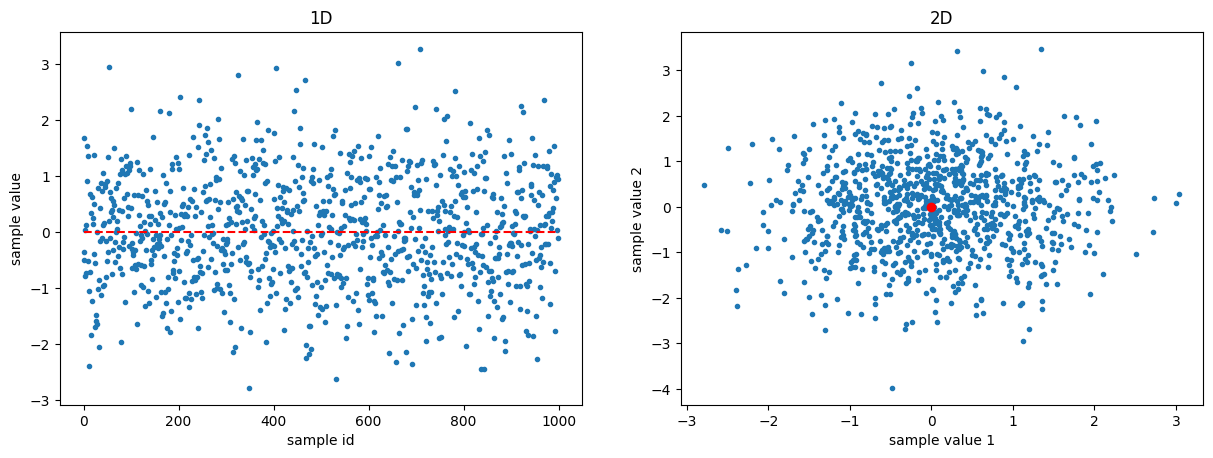

In [536]:
N = 1000

x1D = get_norm(N, 1)
x2D = get_norm(N, 2)
x3D = get_norm(N, 3)

############################################################
# Visualization
############################################################

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(rect=[0.1, 0.1, 2, 1], h_pad=4, w_pad=4)

plt.subplot(1, 2, 1)
plt.plot(range(N), x1D, '.')
plt.plot([0, N], [0,0], 'r--')
plt.xlabel('sample id')
plt.ylabel('sample value')
plt.title('1D')

plt.subplot(1, 2, 2)
plt.plot(x2D[:,0], x2D[:,1], '.')
plt.plot([0], [0], 'or')
plt.xlabel('sample value 1')
plt.ylabel('sample value 2')
plt.title('2D')


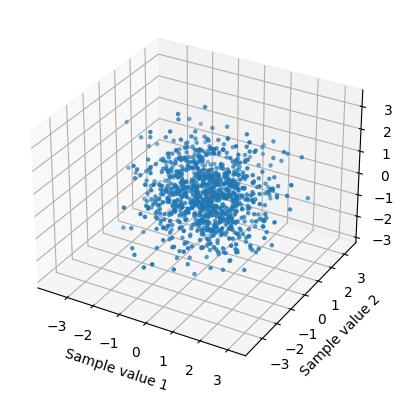

In [537]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x3D[:,0], x3D[:,1], x3D[:,2], marker='.')
ax.scatter([0], [0], [0], 'or')

ax.set_xlabel('Sample value 1')
ax.set_ylabel('Sample value 2')
ax.set_zlabel('Sample value 3')

plt.show()

# Appendix

## Find 0-grad spots for Exercise 1

In [538]:
def bisection(f, a, b, TOL, Nlim=5000):

    fa = f(a)
    fb = f(b)

    d = abs(a - b)

    i = 0
    while d > TOL:
        c = (a + b) / 2

        # f(c)
        fc = f(c)

        if fc == 0:
            return c

        else:

            if fc * fa > 0:
                a = c
                fa = fc
            else:
                b = c
                fb = fc
        # end if fc == 0

        d = abs(a - b)

        # Debug
        i += 1
            
        if i > Nlim:
            print('\nWarning! Watch for the underflow! ~ difference < 1e-15\n')
            print(i, ': a=', a, 'b=', b, '; diff = abs(a - b) = ', d, '\n* f(a)=', fa, '; f(b)=', fb)
            print('* c=', c, '; (a+b)/2 =', (a + b) / 2)

            break
    # end while


    return (a + b)/2

In [539]:
grad1(1.9608040048550776)

-7.344891505601826e-17

In [540]:
grad1(1.9608040048550770)

5.809141463521444e-16

In [541]:
ut = bisection(grad1, 1.9608040048550770, 1.9608040048550776, 1e-18)
ut


Warning! Watch for the underflow! ~ difference < 1e-15

5001 : a= 1.9608040048550774 b= 1.9608040048550777 ; diff = abs(a - b) =  2.220446049250313e-16 
* f(a)= 1.4689783011203652e-16 ; f(b)= -7.344891505601826e-17
* c= 1.9608040048550777 ; (a+b)/2 = 1.9608040048550777


1.9608040048550777

In [542]:
grad1(ut)

-7.344891505601826e-17

In [543]:
grad1(-4.1993940765213)

7.7506375400502e-14

In [544]:
grad1(-4.1993940765212)

-8.609234133349139e-15

In [545]:
ut = bisection(grad1, -4.1993940765213, -4.1993940765212, 1e-18)
ut


Warning! Watch for the underflow! ~ difference < 1e-15

5001 : a= -4.1993940765212106 b= -4.19939407652121 ; diff = abs(a - b) =  8.881784197001252e-16 
* f(a)= 5.351686082892704e-16 ; f(b)= -2.3268200360403056e-16
* c= -4.1993940765212106 ; (a+b)/2 = -4.1993940765212106


-4.1993940765212106

In [546]:
grad1(ut)

5.351686082892704e-16

## Smallest possible IEEE754

In [547]:
9.9e-324 == 0

False

In [548]:
1e-325 == 0

True

# End